In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
%matplotlib inline

In [2]:
train = pd.read_csv('/Users/skylark/Desktop/food demand forecast/train.csv')
meal_info = pd.read_csv('/Users/skylark/Desktop/food demand forecast/meal_info.csv')
fulfilment = pd.read_csv('/Users/skylark/Desktop/food demand forecast/fulfilment_center_info.csv')
test = pd.read_csv('/Users/skylark/Desktop/food demand forecast/test_QoiMO9B.csv')

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
fulfilment.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
new_data = train[['week', 'num_orders']]

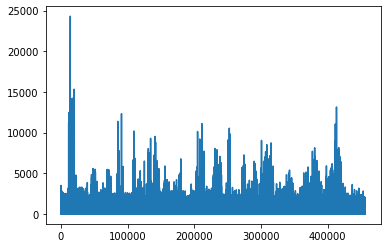

In [8]:
plt.plot(train.num_orders)
plt.show()

In [9]:
train.groupby('week')['num_orders'].sum()

week
1       792261
2       787084
3       695262
4       743529
5      1198675
        ...   
141     776240
142     739661
143     759926
144     801197
145     671926
Name: num_orders, Length: 145, dtype: int64

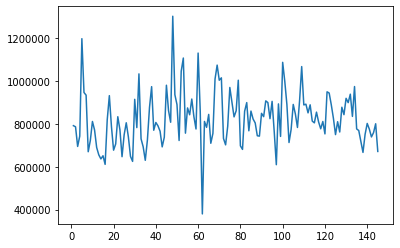

In [10]:
plt.plot(train.groupby('week')['num_orders'].sum())
plt.show()

In [11]:
new_data = new_data.rename(columns={'week':'ds', 'num_orders':'y'})

In [12]:
new_data

,ds,y
0,1,177
1,1,270
2,1,189
3,1,54
4,1,40
...,...,...
456543,145,68
456544,145,42
456545,145,501
456546,145,729


In [13]:
from fbprophet import Prophet

In [14]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

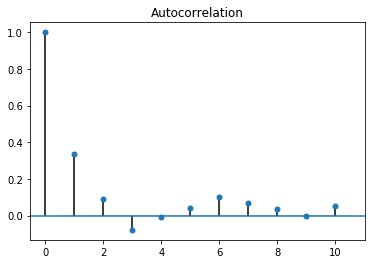

In [15]:
plot_acf(new_data['y'], lags=10)
plt.show()

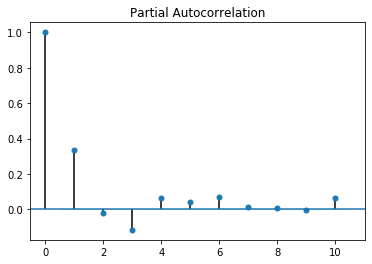

In [16]:
plot_pacf(new_data['y'], lags=10)
plt.show()

In [21]:
new_data

,ds,y
0,1,177
1,1,270
2,1,189
3,1,54
4,1,40
...,...,...
456543,145,68
456544,145,42
456545,145,501
456546,145,729


In [19]:
arima = ARIMA(new_data.y[:436840], order=(1,0,0)).fit()

In [20]:
arima.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: ARMA
======================================================================
Model:              ARMA             BIC:                 6424038.3539
Dependent Variable: y                Log-Likelihood:      -3.2120e+06 
Date:               2020-06-30 17:08 Scale:               1.0000      
No. Observations:   436840           Method:              css-mle     
Df Model:           2                Sample:              0           
Df Residuals:       436838                                0           
Converged:          1.0000           S.D. of innovations: 377.612     
No. Iterations:     2.0000           HQIC:                6424014.776 
AIC:                6424005.3919                                      
------------------------------------------------------------------------
            Coef.     Std.Err.      t       P>|t|     [0.025     0.975] 
------------------------------------------------------------------------
const      263.2677     0.8546   308.0494   0.0000   261.5926   264.9427
ar.L1.y      0.3315     0.0014   232.2264   0.0000     0.3287     0.3343
--------------------------------------------------------------------------------
                 Real            Imaginary           Modulus           Frequency
--------------------------------------------------------------------------------
AR.1            3.0167              0.0000            3.0167              0.0000
======================================================================

"""

In [26]:
pred = arima.predict(436840, 456547)

In [83]:
from sklearn.metrics import mean_squared_log_error

In [30]:
np.sqrt(mean_squared_log_error(new_data.y[436840:], pred))*100

137.0845092672164

In [32]:
adfuller(new_data.y, autolag=None)[0:4]

(-52.58870784105615, 0.0, 99, 456448)

### Regression

In [8]:
train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [9]:
train_new = pd.get_dummies(train, columns=['center_id', 'meal_id'])

In [10]:
train_new = train_new.iloc[:,2:]
train_new.head()

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,...,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956
0,136.83,152.29,0,0,177,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,136.83,135.83,0,0,270,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,134.86,135.86,0,0,189,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,339.50,437.53,0,0,54,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,243.50,242.50,0,0,40,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
test_new = pd.get_dummies(test, columns=['center_id', 'meal_id'])

In [12]:
test_new = test_new.iloc[:,2:]
test_new.head()

,checkout_price,base_price,emailer_for_promotion,homepage_featured,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,...,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956
0,158.11,159.11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,160.11,159.11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,157.14,159.14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,162.02,162.02,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,163.93,163.93,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
label = train_new.num_orders

In [16]:
train_new.drop('num_orders', axis=1, inplace=True)

In [17]:
train_new

,checkout_price,base_price,emailer_for_promotion,homepage_featured,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,...,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956
0,136.83,152.29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,136.83,135.83,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,134.86,135.86,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,339.50,437.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,243.50,242.50,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,484.09,484.09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456544,482.09,482.09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456545,237.68,321.07,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
456546,243.50,313.34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition.pca import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

In [19]:
from sklearn.metrics import SCORERS

In [20]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [77]:
train_x, train_y = train_new[:95874], label[:95874]
test_x, test_y = train_new[95874:], label[95874:]

### Linear Reg

In [81]:
lin_mod = LinearRegression().fit(train_x, np.log(train_y))

In [82]:
pred_lin = lin_mod.predict(test_x)
pred_lin = np.exp(pred_lin)

In [87]:
pred_lin = np.exp(pred_lin)

In [92]:
np.sqrt(mean_squared_log_error(test_y, pred_lin.astype('int32')))*100

65.03410606713544

In [94]:
pred_res = lin_mod.predict(test_new)

In [96]:
pred_res = np.exp(pred_res).astype('int32')
pred_res

array([226, 236, 108, ..., 267, 215, 196], dtype=int32)

In [99]:
result = pd.DataFrame({'id':test['id'], 'num_orders': pred_res}).set_index('id')
result

,num_orders
id,
1028232,226
1127204,236
1212707,108
1082698,33
1400926,29


In [100]:
result.to_csv('/Users/skylark/Desktop/food demand forecast/result.csv')

### Lasso

In [124]:
lasso = Lasso(0.0005).fit(train_x, np.log(train_y))

In [125]:
pred_las = lasso.predict(test_x)
pred_las = np.exp(pred_las).astype('int32')
pred_las

array([ 92,  72,  72, ..., 401, 305, 178], dtype=int32)

In [126]:
np.sqrt(mean_squared_log_error(test_y, pred_las))*100

65.0360803256015

### Ridge

In [141]:
ridge = Ridge(5).fit(train_x, np.log(train_y))

In [142]:
pred_rid = ridge.predict(test_x)
pred_rid = np.exp(pred_rid).astype('int32')
pred_rid

array([ 86,  68,  67, ..., 402, 312, 184], dtype=int32)

In [143]:
np.sqrt(mean_squared_log_error(test_y, pred_rid))*100

65.02211830992778

### Xgboost

In [153]:
xgb = XGBRegressor(learning_rate=2).fit(train_x, np.log(train_y))

[17:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [154]:
pred_xgb = xgb.predict(test_x)
pred_xgb = np.exp(pred_xgb).astype('int32')
pred_xgb

array([5, 0, 2, ..., 3, 3, 2], dtype=int32)

In [155]:
np.sqrt(mean_squared_log_error(test_y, pred_xgb))*100

413.31563701561896

### RandomForest

In [156]:
rdm_mod = RandomForestRegressor()

In [171]:
params = {'max_depth': range(3,11),
         'n_estimators': range(10,200),
         'max_features':['auto', 'sqrt', 0.2, 0.5]}
randcv = RandomizedSearchCV(rdm_mod, param_distributions=params, cv=5)

In [172]:
randcv.fit(train_x, train_y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [173]:
randcv.best_score_

0.5117864600423919

In [174]:
randcv.best_params_

{'n_estimators': 118, 'max_features': 'auto', 'max_depth': 10}

In [175]:
rdm_mod_new = RandomForestRegressor(n_estimators=118, max_features='auto', max_depth=10).fit(train_x, np.log(train_y))

In [176]:
pred_rdm = rdm_mod_new.predict(test_x)
pred_rdm = np.exp(pred_rdm).astype('int32')
pred_rdm

array([ 49,  79, 168, ..., 283, 283, 168], dtype=int32)

In [177]:
np.sqrt(mean_squared_log_error(test_y, pred_rdm))*100

83.16816682159134

### Adaptive Boost

In [181]:
ada_mod = AdaBoostRegressor(n_estimators=100).fit(train_x, np.log(train_y))

In [182]:
pred_ada = ada_mod.predict(test_x)
pred_ada = np.exp(pred_ada).astype('int32')
pred_ada

array([101, 107, 102, ..., 121, 107, 102], dtype=int32)

In [183]:
np.sqrt(mean_squared_log_error(test_y, pred_ada))*100

107.09098586212491

## Dimensionality Reduction (PCA)

In [212]:
x = PCA().fit_transform(train_new)

In [213]:
train_x, train_y = x[:95874], label[:95874]
test_x, test_y = x[95874:], label[95874:]

### Linear reg

In [ ]:
lin_mod = LinearRegression().fit(train_x, np.log(train_y))

In [ ]:
pred_lin2 = lin_mod.predict(test_x)
pred_lin2 = np.exp(pred_lin2).astype('int32')
pred_lin2

In [ ]:
np.sqrt(mean_squared_log_error(test_y, pred_lin2))*100

### Polynomial

In [219]:
train_x, train_y = poly[:95874], label[:95874]
test_x, test_y = poly[95874:], label[95874:]

In [21]:
label

0         177
1         270
2         189
3          54
4          40
         ... 
456543     68
456544     42
456545    501
456546    729
456547    162
Name: num_orders, Length: 456548, dtype: int64

In [24]:
45648/20

2282.4

In [14]:
x = label.values

In [15]:
time_step = 100

In [16]:
feat = []
target = []
for i in range(len(x)):
    if i + time_step < len(x):
        feat.append(x[i:i+time_step])
        target.append(x[i+time_step])

In [17]:
feat[-1]

array([  69,  148,  162,  135,   69,   68,   40,  269,  378,  107, 1188,
        324,  271,  123,  108,  107,  581,  620,  755,   95,   94,  229,
        622,  406,  851,  177,  149,   69,   41,   68,   67,   80,   67,
         82,  689,  850,  271,   42,   13,   14,   69,   69,  161,   42,
        123,   27,   69,  217,  352,   13,   28,  163,  311,  162,   42,
        150,   80,  634,  473,  325,  447,  257,  149,   28,  136,   26,
        271,  378,  312,  134,   42,   82,  323,  190,  593,   53,   27,
         42,  176,  123,   28,   54,   54,  270,  540,  256,   69,   26,
        162,  176,  256,   54,  123,  134,   67,   42,   68,   42,  501,
        729])

In [22]:
feat = np.array(feat).reshape(456448, 100, 1)
target = np.array(target)

In [26]:
train_x, train_y = feat[:319514], target[:319514]
test_x, test_y = feat[319514:], target[319514:]

In [27]:
train_x.shape

(319514, 100, 1)

In [28]:
test_x.shape

(136934, 100, 1)

In [29]:
from keras import models, layers, optimizers, regularizers, callbacks

Using TensorFlow backend.


In [94]:
model = models.Sequential()

In [95]:
model.add(layers.LSTM(32, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.05), return_sequences=True, input_shape=(100,1)))
model.add(layers.LSTM(64, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.05)))

model.add(layers.Dense(256, kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.05), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 100, 32)           4352      
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
_________________________________________________________________


In [96]:
call_backs = [callbacks.ModelCheckpoint(filepath='/Users/skylark/Desktop/food demand forecast/model.h5'),
              callbacks.EarlyStopping(patience=10),
             callbacks.ReduceLROnPlateau()]

In [97]:
model.compile(optimizer=optimizers.RMSprop(2e-3), loss='mae', metrics=['acc'])
history = model.fit(train_x, train_y, batch_size=256, epochs=20, validation_split=0.2, shuffle=False, callbacks=call_backs)

Train on 255611 samples, validate on 63903 samples
Epoch 1/20
255611/255611 [==============================] - 2087s 8ms/step - loss: 213.2234 - acc: 0.0022 - val_loss: 196.6825 - val_acc: 0.0000e+00
Epoch 2/20
255611/255611 [==============================] - 521s 2ms/step - loss: 209.3114 - acc: 0.0021 - val_loss: 196.0696 - val_acc: 0.0000e+00
Epoch 3/20
255611/255611 [==============================] - 761s 3ms/step - loss: 208.8392 - acc: 0.0020 - val_loss: 196.3492 - val_acc: 0.0000e+00
Epoch 4/20
255611/255611 [==============================] - 573s 2ms/step - loss: 208.6917 - acc: 0.0020 - val_loss: 195.6267 - val_acc: 0.0000e+00
Epoch 5/20
255611/255611 [==============================] - 501s 2ms/step - loss: 209.1034 - acc: 0.0022 - val_loss: 196.1179 - val_acc: 0.0000e+00
Epoch 6/20
255611/255611 [==============================] - 489s 2ms/step - loss: 209.0497 - acc: 0.0022 - val_loss: 196.2581 - val_acc: 0.0000e+00
Epoch 7/20
255611/255611 [==============================] - 

In [99]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

In [100]:
val_loss = history.history['val_loss']
loss = history.history['loss']

val_acc = history.history['val_acc']
acc = history.history['acc']

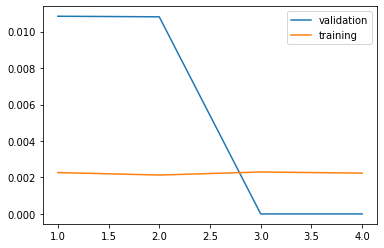

In [63]:
plt.plot(range(1,5), val_acc, label='validation')
plt.plot(range(1,5), acc, label='training')
plt.legend()
plt.show()

In [64]:
model.evaluate(test_x, test_y)

136934/136934 [==============================] - 494s 4ms/step


[197.47793134377628, 0.0]

In [82]:
pred = model.predict(test_x)

In [86]:
np.sqrt(mean_squared_log_error(test_y, int(pred)))

TypeError: only size-1 arrays can be converted to Python scalars

In [80]:
input_x = []
for i in test_x[-1][1:]:
    input_x.append(i[0])

input_x.append(test_y[-1])    
input_x = np.array(input_x).reshape(1, 100, 1)

array([[[ 148],
        [ 162],
        [ 135],
        [  69],
        [  68],
        [  40],
        [ 269],
        [ 378],
        [ 107],
        [1188],
        [ 324],
        [ 271],
        [ 123],
        [ 108],
        [ 107],
        [ 581],
        [ 620],
        [ 755],
        [  95],
        [  94],
        [ 229],
        [ 622],
        [ 406],
        [ 851],
        [ 177],
        [ 149],
        [  69],
        [  41],
        [  68],
        [  67],
        [  80],
        [  67],
        [  82],
        [ 689],
        [ 850],
        [ 271],
        [  42],
        [  13],
        [  14],
        [  69],
        [  69],
        [ 161],
        [  42],
        [ 123],
        [  27],
        [  69],
        [ 217],
        [ 352],
        [  13],
        [  28],
        [ 163],
        [ 311],
        [ 162],
        [  42],
        [ 150],
        [  80],
        [ 634],
        [ 473],
        [ 325],
        [ 447],
        [ 257],
        [ 149],
        